<a href="https://colab.research.google.com/github/nemodesouza/TCC-AIX/blob/main/consistencia_interna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# UNIVERSIDADE FEDERAL DE SANTA CATARINA
# CENTRO TECNOLÓGICO
# DEPARTAMENTO DE INFORMÁTICA E ESTATÍSTICA
# GRADUAÇÃO EM SISTEMAS DE INFORMAÇÃO
# TRABALHO DE CONCLUSÃO DE CURSO
# NEMO DE SOUZA

# PA2 = Análise de Consistência Interna do Checklist AIX
# Script para a análise de consistência interna do checklist de heurísticas de usabilidade

# Carregamento de bibliotecas
if (!require(psych)) install.packages("psych")      # Para alfa de Cronbach e análise fatorial
if (!require(dplyr)) install.packages("dplyr")      # Para manipulação de dados
if (!require(tidyr)) install.packages("tidyr")      # Para reorganização de dados
if (!require(ggplot2)) install.packages("ggplot2")  # Para visualizações

library(psych)
library(dplyr)
library(tidyr)
library(ggplot2)

Loading required package: psych

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘psych’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘GPArotation’


Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: ggplot2


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [2]:
# Carregamento dos dados

### OBS: antes de executar, carregue os arquivos (de mesmo nome) na pasta do Colab (barra lateral "Arquivos")

# Ajuste o caminho conforme necessário
dados_path <- "PA2 a PA4 - matrix_avaliacao_aplicativos.csv"
heuristicas_path <- "matriz_heuristicas_e_itens_checklist.csv"

dados <- read.csv(dados_path, stringsAsFactors = FALSE)
heuristicas <- read.csv(heuristicas_path, stringsAsFactors = FALSE)

# Verificação da estrutura dos dados
str(dados)
head(dados)

# Verificar a estrutura das heurísticas
str(heuristicas)
head(heuristicas)

'data.frame':	127 obs. of  25 variables:
 $ N.         : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Nome.do.App: chr  "AI Dermatologist: Skin Scanner" "ArchAIDE" "Bird ID - Picture Identifier" "Bird Identification Apps" ...
 $ c1         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c2         : chr  "Não" "Não" "Não" "Não" ...
 $ c3         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c4         : chr  "Sim" "Não" "Não" "Não" ...
 $ c5         : chr  "Sim" "Sim" "Sim" "Sim" ...
 $ c6         : chr  "Sim" "Não" "Sim" "Sim" ...
 $ c7         : chr  "Não" "Não" "Sim" "Não" ...
 $ c8         : chr  "Sim" NA NA NA ...
 $ c9         : chr  NA NA NA NA ...
 $ c10        : chr  "Sim" "Não" "Não" "Não" ...
 $ c11        : chr  "Sim" "Sim" "Não" "Não" ...
 $ c12        : chr  "Não" "Não" "Não" "Não" ...
 $ c13        : chr  "Não" "Não" "Não" "Não" ...
 $ c14        : chr  "Não" "Não" "Sim" "Não" ...
 $ c15        : chr  "Não" "Não" "Sim" "Não" ...
 $ c16        : chr  "Não" NA NA NA ...
 $ c17        : chr  NA NA NA NA

,N.,Nome.do.App,c1,c2,c3,c4,c5,c6,c7,c8,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,AI Dermatologist: Skin Scanner,Sim,Não,Sim,Sim,Sim,Sim,Não,Sim,⋯,Não,Não,Não,NA,Sim,NA,Sim,NA,Não,Sim
2,2,ArchAIDE,Sim,Não,Sim,Não,Sim,Não,Não,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA
3,3,Bird ID - Picture Identifier,Sim,Não,Sim,Não,Sim,Sim,Sim,NA,⋯,Sim,Sim,NA,NA,Sim,NA,Sim,NA,NA,NA
4,4,Bird Identification Apps,Sim,Não,Sim,Não,Sim,Sim,Não,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA
5,5,CamFind,Sim,Não,Sim,Não,Sim,Não,NA,NA,⋯,NA,Não,NA,Não,NA,NA,Sim,NA,NA,NA
6,6,Cash Reader: Bill Identifier,Sim,Não,Sim,Não,Não,Não,NA,NA,⋯,Não,Não,NA,NA,Sim,NA,Sim,NA,NA,NA


'data.frame':	23 obs. of  6 variables:
 $ ID.Heurística     : chr  "h1" "h1" "h1" "h2" ...
 $ Heurística        : chr  "Deixar as expectativas e limitações explícitas" "Deixar as expectativas e limitações explícitas" "Deixar as expectativas e limitações explícitas" "Apoiar o uso efetivo" ...
 $ ID.checklist      : chr  "c1" "c2" "c3" "c4" ...
 $ Item.de.checklist : chr  "1. O app deixa claro quais classes ele pode classificar?" "2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?" "3. O aplicativo fornece explicações compreensíveis?" "4. O app mostra dicas de como tirar fotos com qualidade adequada?" ...
 $ Explicação.do.item: chr  "O app apresenta as classes que é capaz de distinguir antes do usuário poder classificar uma imagem. (p.ex. na tela home)." "O app apresenta ao usuário o grau do seu desempenho (p.ex. acurácia) antes do usuário poder classificar uma ima"| __truncated__ "O app utiliza apenas uma terminologia compreensível pelo público alvo, evita

,ID.Heurística,Heurística,ID.checklist,Item.de.checklist,Explicação.do.item,Escala.de.resposta
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,h1,Deixar as expectativas e limitações explícitas,c1,1. O app deixa claro quais classes ele pode classificar?,O app apresenta as classes que é capaz de distinguir antes do usuário poder classificar uma imagem. (p.ex. na tela home).,"Sim, Não"
2,h1,Deixar as expectativas e limitações explícitas,c2,2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?,O app apresenta ao usuário o grau do seu desempenho (p.ex. acurácia) antes do usuário poder classificar uma imagem. p.ex. na tela home).,"Sim, Não"
3,h1,Deixar as expectativas e limitações explícitas,c3,3. O aplicativo fornece explicações compreensíveis?,"O app utiliza apenas uma terminologia compreensível pelo público alvo, evitando jargão técnico, ao apresentar as expectativas e limitações.","Sim, Não"
4,h2,Apoiar o uso efetivo,c4,4. O app mostra dicas de como tirar fotos com qualidade adequada?,O app apresenta instruções/dicas para guiar o usuário a tirar fotos com qualidade adequada para a classificação.,"Sim, Não"
5,h2,Apoiar o uso efetivo,c5,5. O app visualiza o status durante o processamento da classificação?,O app apresenta elementos para visualizar o status do progresso durante o processamento da classificação.,"Sim, Não"
6,h3,Apoiar a compreensão do usuário sobre incerteza e a confiança do modelo,c6,6. O app deixa claro que existe incerteza em relação ao resultado da classificação?,O resultado da classificação é apresentado indicando que existe uma incerteza em relação a este resultado.,"Sim, Não"


In [3]:
#### Preparação dos dados para análise

# Seleção das colunas dos itens (c1 a c23)
itens <- dados[, grep("^c\\d+$", names(dados))]

# Conversão das respostas para valores numéricos (Sim = 1, Não = 0, NA = NA)
itens_num <- as.data.frame(lapply(itens, function(x) {
  ifelse(x == "Sim", 1, ifelse(x == "Não", 0, NA))
}))

# Verificação da conversão
head(itens_num)


,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,⋯,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,1,1,1,1,0,1,NA,1,⋯,0,0,0,NA,1,NA,1,NA,0,1
2,1,0,1,0,1,0,0,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA
3,1,0,1,0,1,1,1,NA,NA,0,⋯,1,1,NA,NA,1,NA,1,NA,NA,NA
4,1,0,1,0,1,1,0,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA
5,1,0,1,0,1,0,NA,NA,0,0,⋯,NA,0,NA,0,NA,NA,1,NA,NA,NA
6,1,0,1,0,0,0,NA,NA,NA,0,⋯,0,0,NA,NA,1,NA,1,NA,NA,NA


In [5]:
#### Criação do dicionário para mapear códigos de itens para descrições de heurísticas

# Estrutura arquivo:
# - ID Heurística: h1, h2, etc.
# - Heurística: Descrição da heurística
# - ID checklist: c1, c2, etc.
# - Item de checklist: Descrição do checklist

id_heuristicas <- heuristicas$ID.Heurística
descricoes_heuristicas <- heuristicas$Heurística
codigos_itens <- heuristicas$ID.checklist
descricoes_itens <- heuristicas$Item.de.checklist

# Criação dataframe de mapeamento
dicionario <- data.frame(
  codigo_item = codigos_itens,
  descricao_item = descricoes_itens,
  id_heuristica = id_heuristicas,
  descricao_heuristica = descricoes_heuristicas,
  stringsAsFactors = FALSE
)

# Verificação o dicionário criado
head(dicionario)

,codigo_item,descricao_item,id_heuristica,descricao_heuristica
,<chr>,<chr>,<chr>,<chr>
1,c1,1. O app deixa claro quais classes ele pode classificar?,h1,Deixar as expectativas e limitações explícitas
2,c2,2. O aplicativo deixa claro o quão bem ele pode fazer a classificação de imagens?,h1,Deixar as expectativas e limitações explícitas
3,c3,3. O aplicativo fornece explicações compreensíveis?,h1,Deixar as expectativas e limitações explícitas
4,c4,4. O app mostra dicas de como tirar fotos com qualidade adequada?,h2,Apoiar o uso efetivo
5,c5,5. O app visualiza o status durante o processamento da classificação?,h2,Apoiar o uso efetivo
6,c6,6. O app deixa claro que existe incerteza em relação ao resultado da classificação?,h3,Apoiar a compreensão do usuário sobre incerteza e a confiança do modelo


In [6]:
#### Identificação e remoção de colunas problemáticas
# Cálculo da porcentagem de NAs em cada coluna
na_percentagem <- colMeans(is.na(itens_num)) * 100
print("Porcentagem de NAs em cada coluna:")
print(na_percentagem)

# Cálculo do desvio padrão de cada coluna
desvios <- sapply(itens_num, sd, na.rm = TRUE)
print("Desvio padrão de cada coluna:")
print(desvios)

# Colunas com desvio padrão zero ou muito baixo
colunas_desvio_zero <- names(desvios[desvios < 0.1])
print("Colunas com desvio padrão próximo de zero:")
print(colunas_desvio_zero)

# Colunas com muitos NAs (mais de 30%)
colunas_muitos_na <- names(na_percentagem[na_percentagem > 30])
print("Colunas com mais de 30% de NAs:")
print(colunas_muitos_na)

# Colunas a serem removidas (desvio zero ou muitos NAs)
colunas_remover <- unique(c(colunas_desvio_zero, colunas_muitos_na))
print("Colunas a serem removidas:")
print(colunas_remover)

# Conjunto de dados limpo
itens_limpos <- itens_num[, !(names(itens_num) %in% colunas_remover)]

# Verificação das dimensões do conjunto de dados após limpeza
print("Dimensões do conjunto de dados após limpeza:")
print(dim(itens_limpos))

# Dataframe com informações detalhadas sobre os itens removidos
itens_removidos <- data.frame(
  codigo = colunas_remover,
  descricao = sapply(colunas_remover, function(codigo) {
    idx <- which(dicionario$codigo_item == codigo)
    if (length(idx) > 0) dicionario$descricao_item[idx[1]] else NA
  }),
  motivo = sapply(colunas_remover, function(codigo) {
    if (codigo %in% colunas_desvio_zero) {
      if (codigo %in% colunas_muitos_na) {
        return("Desvio padrão próximo de zero e muitos NAs")
      } else {
        return("Desvio padrão próximo de zero")
      }
    } else {
      return("Muitos valores NA")
    }
  })
)


[1] "Porcentagem de NAs em cada coluna:"
      c1       c2       c3       c4       c5       c6       c7       c8 
 0.00000  0.00000  0.00000  0.00000  0.00000  0.00000 41.73228 76.37795 
      c9      c10      c11      c12      c13      c14      c15      c16 
83.46457  0.00000  0.00000  0.00000  0.00000 11.81102  0.00000 61.41732 
     c17      c18      c19      c20      c21      c22      c23 
80.31496 14.17323 69.29134  0.00000 74.80315 66.14173 69.29134 
[1] "Desvio padrão de cada coluna:"
       c1        c2        c3        c4        c5        c6        c7        c8 
0.4993434 0.3240168 0.3866281 0.4936796 0.4264414 0.5000937 0.5017555 0.4301831 
       c9       c10       c11       c12       c13       c14       c15       c16 
0.4830459 0.2823828 0.4631125 0.5012171 0.4264414 0.4240972 0.4445226 0.2422261 
      c17       c18       c19       c20       c21       c22       c23 
0.4358899 0.4866551 0.3655178 0.3144243 0.4399413 0.4538503 0.2699528 
[1] "Colunas com desvio padrão próxim

In [7]:
# Informações detalhadas sobre os itens removidos
print("Detalhes dos itens removidos:")
print(itens_removidos)

[1] "Detalhes dos itens removidos:"
    codigo
c7      c7
c8      c8
c9      c9
c16    c16
c17    c17
c19    c19
c21    c21
c22    c22
c23    c23
                                                                                                                                   descricao
c7                                                                     7. O app indica a incerteza de forma compreensível pelo público alvo?
c8                                                                                           8. O app demonstra os resultados de forma útil?
c9                            9. O app deixa claro que existe incerteza quando utiliza o resultado da classificação em outra funcionalidade?
c16                                           16. O app permite que o usuário solicite a verificação do resultado por especialistas humanos?
c17 17. O app permite que usuários com conhecimento no domínio do aplicativo possam enviar feedback referente ao resultado da classificação?
c19     

In [8]:
# Salvamento da lista de itens removidos para referência futura
write.csv(itens_removidos, "itens_removidos.csv", row.names = FALSE)
# OBS: os arquivos gerados estarão disponíveis para download na lateral, no menu "Arquivos"

In [9]:
#### Calculo do Alfa de Cronbach usando correlações par a par
alfa_resultado <- alpha(itens_limpos, check.keys = TRUE, use = "pairwise.complete.obs")
print("Alfa de Cronbach para o checklist limpo (usando correlações par a par):")
print(alfa_resultado$total$raw_alpha)
print(alfa_resultado$total)

Warning message in alpha(itens_limpos, check.keys = TRUE, use = "pairwise.complete.obs"):
“Some items were negatively correlated with the first principal component and were automatically reversed.
 This is indicated by a negative sign for the variable name.”


[1] "Alfa de Cronbach para o checklist limpo (usando correlações par a par):"
[1] 0.6968945
 raw_alpha std.alpha   G6(smc) average_r      S/N        ase      mean
 0.6968945 0.7055326 0.7596289 0.1461312 2.395962 0.03869875 0.4286652
        sd  median_r
 0.1951348 0.1687884


In [10]:
#### Calculo do Ômega de McDonald  com correlações par a par
tryCatch({
  # Tentar com opções mais robustas
  omega_resultado <- omega(itens_limpos, nfactors = 4,
                           use = "pairwise.complete.obs",
                           fm = "ml",       # Método de máxima verossimilhança
                           plot = FALSE,    # Não plotar resultados
                           warnings = FALSE) # Suprimir avisos

  cat("Ômega de McDonald para o checklist limpo:\n")
  cat("Ômega Total:", round(omega_resultado$omega.tot, 3), "\n")
  cat("Ômega Hierárquico:", round(omega_resultado$omega_h, 3), "\n")
}, error = function(e) {
  cat("Erro ao calcular Ômega de McDonald com 4 fatores:", e$message, "\n")
  cat("Tentando com menos fatores...\n")

  # Tentar com 3 fatores
  tryCatch({
    omega_resultado <- omega(itens_limpos, nfactors = 3,
                             use = "pairwise.complete.obs",
                             fm = "ml",
                             plot = FALSE,
                             warnings = FALSE)

    cat("Ômega Total (3 fatores):", round(omega_resultado$omega.tot, 3), "\n")
    cat("Ômega Hierárquico (3 fatores):", round(omega_resultado$omega_h, 3), "\n")

    # Armazenar o resultado para uso posterior
    assign("omega_resultado", omega_resultado, envir = .GlobalEnv)
  }, error = function(e2) {
    cat("Erro ao calcular Ômega de McDonald com 3 fatores:", e2$message, "\n")
    cat("Tentando com 2 fatores...\n")

    # Tentar com 2 fatores
    tryCatch({
      omega_resultado <- omega(itens_limpos, nfactors = 2,
                               use = "pairwise.complete.obs",
                               fm = "ml",
                               plot = FALSE,
                               warnings = FALSE)

      cat("Ômega Total (2 fatores):", round(omega_resultado$omega.tot, 3), "\n")
      cat("Ômega Hierárquico (2 fatores):", round(omega_resultado$omega_h, 3), "\n")

      # Armazenar o resultado para uso posterior
      assign("omega_resultado", omega_resultado, envir = .GlobalEnv)
    }, error = function(e3) {
      cat("Erro ao calcular Ômega de McDonald com 2 fatores:", e3$message, "\n")

      # Última tentativa: usar um método alternativo
      cat("Tentando método alternativo (minres)...\n")
      tryCatch({
        omega_resultado <- omega(itens_limpos, nfactors = 2,
                                 use = "pairwise.complete.obs",
                                 fm = "minres",  # Método alternativo
                                 plot = FALSE,
                                 warnings = FALSE)

        cat("Ômega Total (método alternativo):", round(omega_resultado$omega.tot, 3), "\n")
        cat("Ômega Hierárquico (método alternativo):", round(omega_resultado$omega_h, 3), "\n")

        # Armazenar o resultado para uso posterior
        assign("omega_resultado", omega_resultado, envir = .GlobalEnv)
      }, error = function(e4) {
        cat("Não foi possível calcular o Ômega de McDonald com nenhum método.\n")
        cat("Prosseguindo com a análise sem o Ômega.\n")
      })
    })
  })
})


Loading required namespace: GPArotation



Ômega de McDonald para o checklist limpo:
Ômega Total: 0.791 
Ômega Hierárquico: 0.473 


In [11]:
#### Cálculo do Alfa de Cronbach para cada grupo de heurísticas

# Grupos únicos de heurísticas
grupos_unicos <- unique(dicionario$id_heuristica[!is.na(dicionario$id_heuristica)])
resultados_por_grupo <- list()

print("Alfa de Cronbach por grupo de heurísticas:")

for (grupo in grupos_unicos) {
  # Obtenção dos códigos dos itens para este grupo
  codigos_grupo <- dicionario$codigo_item[dicionario$id_heuristica == grupo]

  # Verificação de se todos os códigos existem nas colunas de itens limpos
  codigos_validos <- codigos_grupo[codigos_grupo %in% names(itens_limpos)]

  # Se pelo menos 2 itens válidos, calculo do alfa
  if (length(codigos_validos) > 1) {

    # Selação apenas desses itens dos dados
    itens_grupo <- itens_limpos[, codigos_validos]

    # Cálculo do Alfa de Cronbach para esse grupo
    alfa_grupo <- alpha(itens_grupo, check.keys = TRUE, use = "pairwise.complete.obs")

    # Nome do grupo (pegar a primeira ocorrência não-NA)
    nome_grupo <- dicionario$descricao_heuristica[dicionario$id_heuristica == grupo][1]

    # Armazenar resultados
    resultados_por_grupo[[grupo]] <- list(
      nome = nome_grupo,
      alfa_raw = alfa_grupo$total$raw_alpha,
      alfa_std = alfa_grupo$total$std.alpha,
      n_itens = length(codigos_validos),
      itens = codigos_validos
    )

    # Exibição de resultados
    cat("\nGrupo:", grupo, "-", nome_grupo, "\n")
    cat("Número de itens:", length(codigos_validos), "\n")
    cat("Itens:", paste(codigos_validos, collapse = ", "), "\n")
    cat("Alfa de Cronbach (raw):", round(alfa_grupo$total$raw_alpha, 3), "\n")
    cat("Alfa de Cronbach (std):", round(alfa_grupo$total$std.alpha, 3), "\n")
  } else {
    cat("\nGrupo:", grupo, "\n")
    cat("Número de itens insuficiente para calcular alfa (precisa de pelo menos 2 itens)\n")
    cat("Itens:", paste(codigos_validos, collapse = ", "), "\n")
  }
}


[1] "Alfa de Cronbach por grupo de heurísticas:"

Grupo: h1 - Deixar as expectativas e limitações explícitas 
Número de itens: 3 
Itens: c1, c2, c3 
Alfa de Cronbach (raw): 0.443 
Alfa de Cronbach (std): 0.457 

Grupo: h2 - Apoiar o uso efetivo 
Número de itens: 2 
Itens: c4, c5 
Alfa de Cronbach (raw): 0.514 
Alfa de Cronbach (std): 0.518 

Grupo: h3 - Apoiar a compreensão do usuário sobre 
incerteza e a confiança do modelo 
Número de itens: 2 
Itens: c6, c10 
Alfa de Cronbach (raw): 0.254 
Alfa de Cronbach (std): 0.29 

Grupo: h4 
Número de itens insuficiente para calcular alfa (precisa de pelo menos 2 itens)
Itens: c11 

Grupo: h5 - Falhar graciosamente e suportar a recuperação de erros 
Número de itens: 4 
Itens: c12, c13, c14, c15 
Alfa de Cronbach (raw): 0.67 
Alfa de Cronbach (std): 0.675 

Grupo: h6 
Número de itens insuficiente para calcular alfa (precisa de pelo menos 2 itens)
Itens: c18 

Grupo: h7 
Número de itens insuficiente para calcular alfa (precisa de pelo menos 2 ite

In [13]:
#### Análise de itens - como cada item afeta a confiabilidade
print("Alfa se o item for removido:")
alfa_drop <- alfa_resultado$alpha.drop

# Adicionar descrições dos itens
alfa_drop$descricao <- sapply(rownames(alfa_drop), function(codigo) {
  idx <- which(dicionario$codigo_item == codigo)
  if (length(idx) > 0) dicionario$descricao_item[idx[1]] else NA
})

alfa_drop$heuristica <- sapply(rownames(alfa_drop), function(codigo) {
  idx <- which(dicionario$codigo_item == codigo)
  if (length(idx) > 0) dicionario$id_heuristica[idx[1]] else NA
})

# Ordenação do impacto na confiabilidade (maior alfa se removido = item menos importante)
alfa_drop_ordenado <- alfa_drop[order(alfa_drop$raw_alpha, decreasing = TRUE), ]
print(alfa_drop_ordenado)

# Identificação de itens problemáticos (remoção aumentaria o alfa)
itens_problematicos <- alfa_drop_ordenado[alfa_drop_ordenado$raw_alpha > alfa_resultado$total$raw_alpha, ]
if (nrow(itens_problematicos) > 0) {
  print("Itens cuja remoção aumentaria o Alfa de Cronbach:")
  print(itens_problematicos)
} else {
  print("Nenhum item cuja remoção aumentaria o Alfa de Cronbach.")
}

[1] "Alfa se o item for removido:"
     raw_alpha std.alpha   G6(smc) average_r      S/N   alpha se      var.r
c20  0.7058821 0.7220849 0.7673252 0.1665716 2.598221 0.03801950 0.01810552
c6   0.7034801 0.7075998 0.7573794 0.1569374 2.419970 0.03781521 0.02124048
c18- 0.7023165 0.7100529 0.7508353 0.1585164 2.448905 0.03818729 0.01822169
c3   0.6937754 0.7033421 0.7538394 0.1542452 2.370886 0.03926228 0.02171861
c12  0.6931792 0.6991200 0.7486086 0.1516345 2.323584 0.03923323 0.02093775
c1   0.6878729 0.6948056 0.7505721 0.1490253 2.276600 0.03976847 0.02169536
c11  0.6878109 0.6968042 0.7544843 0.1502267 2.298198 0.03986514 0.02303853
c5   0.6829825 0.6947423 0.7487352 0.1489874 2.275920 0.04060530 0.02226213
c10  0.6779814 0.6807810 0.7288890 0.1409301 2.132646 0.04121058 0.02029057
c2   0.6703755 0.6734072 0.7236647 0.1368961 2.061917 0.04212047 0.01902739
c14  0.6695415 0.6787127 0.7378662 0.1397838 2.112479 0.04229588 0.02234780
c15  0.6645143 0.6762844 0.7315261 0.1384527 2.089131

In [16]:
#### Salvamento dos resultados em CSV

# Dataframe com os resultados por grupo
grupos_df <- data.frame(
  grupo = names(resultados_por_grupo),
  nome_grupo = sapply(resultados_por_grupo, function(x) x$nome),
  alfa = sapply(resultados_por_grupo, function(x) x$alfa_raw),  # IMPORTANTE: Usando 'alfa' consistentemente
  alfa_std = sapply(resultados_por_grupo, function(x) x$alfa_std),
  n_itens = sapply(resultados_por_grupo, function(x) x$n_itens)
)

# Filtragem dos grupos com pelo menos 2 itens
grupos_df <- grupos_df[grupos_df$n_itens > 1, ]

# Ordenação por valor de alfa
grupos_df <- grupos_df[order(grupos_df$alfa, decreasing = TRUE), ]  # IMPORTANTE: Usando 'alfa' consistentemente

# Criação de dataframe de resultados finais
resultados_csv <- data.frame(
  grupo = c("Checklist Completo", grupos_df$grupo),
  nome_grupo = c("Checklist Completo", grupos_df$nome_grupo),
  alfa = c(alfa_resultado$total$raw_alpha, grupos_df$alfa),  # IMPORTANTE: Usando 'alfa' consistentemente
  alfa_std = c(alfa_resultado$total$std.alpha, grupos_df$alfa_std),
  n_itens = c(ncol(itens_limpos), grupos_df$n_itens)
)

# Adição do ômega se calculado com sucesso
if (exists("omega_resultado")) {
  resultados_csv$omega_total <- c(omega_resultado$omega.tot, rep(NA, nrow(grupos_df)))
  resultados_csv$omega_hierarquico <- c(omega_resultado$omega_h, rep(NA, nrow(grupos_df)))
}


In [17]:
# Salvamento em CSV
write.csv(resultados_csv, "resultados_consistencia_interna.csv", row.names = FALSE)
write.csv(alfa_drop_ordenado, "analise_itens.csv", row.names = TRUE)
write.csv(itens_removidos, "itens_removidos.csv", row.names = FALSE)

In [20]:
# Matriz de correlação
tryCatch({
  cor_itens <- cor(itens_limpos, use = "pairwise.complete.obs")
  write.csv(cor_itens, "matriz_correlacao.csv", row.names = TRUE)
}, error = function(e) {
  print("Não foi possível calcular a matriz de correlação:", e$message)
})

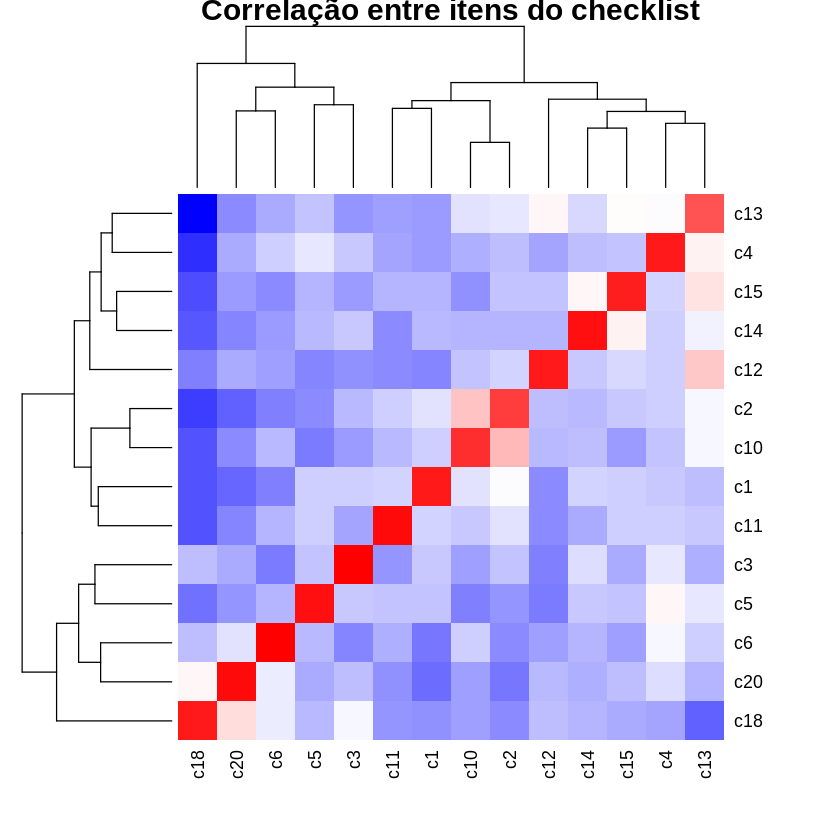

In [25]:
#### Visualizações

# 1. Visualização da correlação entre itens
cor_itens <- cor(itens_limpos, use = "pairwise.complete.obs")
heatmap(cor_itens,
        main = "Correlação entre itens do checklist",
        col = colorRampPalette(c("blue", "white", "red"))(100))


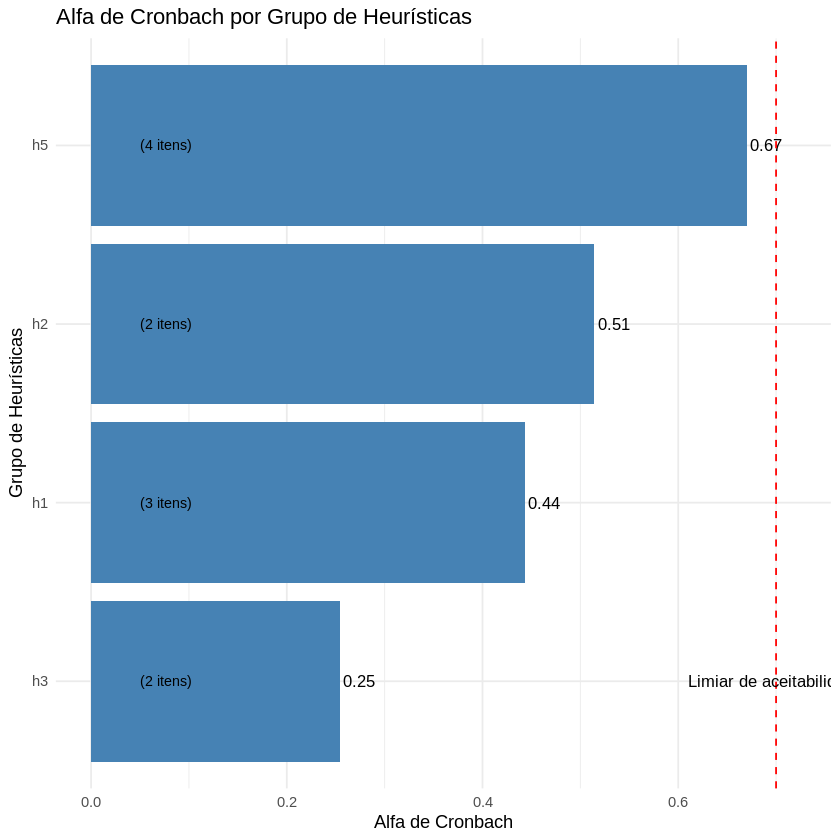

In [26]:
# 2. Gráfico de barras para o Alfa por grupo
# IMPORTANTE: Usando 'alfa' consistentemente em todo o código
plot_alfa_grupo <- ggplot(grupos_df, aes(x = reorder(grupo, alfa), y = alfa)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  geom_text(aes(label = round(alfa, 2)), hjust = -0.1, size = 3.5) +
  geom_text(aes(label = paste0("(", n_itens, " itens)")), y = 0.05, hjust = 0, size = 3) +
  coord_flip() +
  labs(title = "Alfa de Cronbach por Grupo de Heurísticas",
       x = "Grupo de Heurísticas",
       y = "Alfa de Cronbach") +
  theme_minimal() +
  geom_hline(yintercept = 0.7, linetype = "dashed", color = "red") +
  annotate("text", x = 1, y = 0.72, label = "Limiar de aceitabilidade (0.7)", size = 3.5)

# Plotar a imagem
print(plot_alfa_grupo)

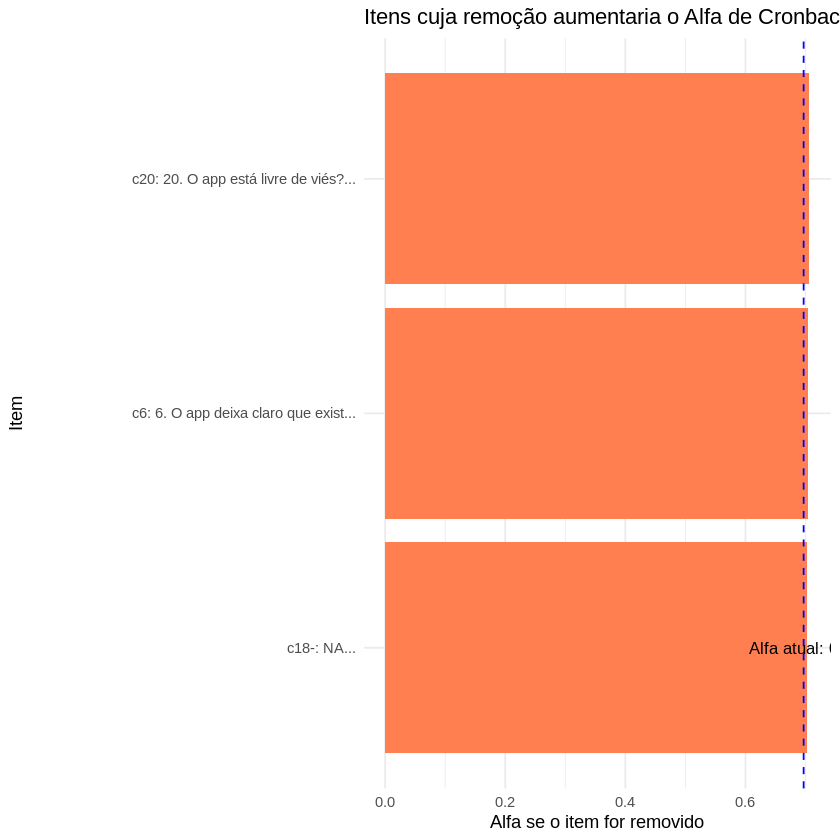

In [28]:
# 3. Gráfico para itens problemáticos
if(nrow(itens_problematicos) > 0) {

  itens_problematicos$item_nome <- paste0(rownames(itens_problematicos), ": ",
                                         substr(itens_problematicos$descricao, 1, 30), "...")

  plot_itens_problematicos <- ggplot(itens_problematicos, aes(x = reorder(item_nome, raw_alpha), y = raw_alpha)) +
    geom_bar(stat = "identity", fill = "coral") +
    geom_hline(yintercept = alfa_resultado$total$raw_alpha, linetype = "dashed", color = "blue") +
    annotate("text", x = 1, y = alfa_resultado$total$raw_alpha + 0.01,
             label = paste("Alfa atual:", round(alfa_resultado$total$raw_alpha, 3)), size = 3.5) +
    coord_flip() +
    labs(title = "Itens cuja remoção aumentaria o Alfa de Cronbach",
         x = "Item",
         y = "Alfa se o item for removido") +
    theme_minimal()


  print(plot_itens_problematicos)
}